In [ ]:
import tensorflow as tf
import numpy as np

## Define a simple dummy dataset

In [ ]:
X = tf.random.uniform((100,2))
y = (X+5)*0.3

In [ ]:
type(X), type(y)

(tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.framework.ops.EagerTensor)

In [ ]:
X.shape, y.shape

(TensorShape([100, 2]), TensorShape([100, 2]))

## Define A Simple NN

In [ ]:
model =  tf.keras.Sequential([
    tf.keras.layers.Input(name="InputLayer", shape=[2]),
    tf.keras.layers.Dense(2, name="Layer1"),
    tf.keras.layers.Dense(1, name="Layer2"),
 ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 2)                 6         
                                                                 
 Layer2 (Dense)              (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].weights

[<tf.Variable 'Layer1/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.9195465 , -0.81695545],
        [ 0.66359425, -0.80382353]], dtype=float32)>,
 <tf.Variable 'Layer1/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

## Train NN

In [ ]:
model.compile(loss = "MSE", optimizer="adam")
model.fit(X,y, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 7.9646
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 7.8101
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 7.6622
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 7.5151
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 7.3680
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 7.2228
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 7.0836
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 6.9403
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 6.8043
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 6.6700
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 6.5424
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 6.4145
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

In [ ]:
model.weights

[<tf.Variable 'Layer1/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.60004365, -0.5216356 ],
        [ 0.96416473, -0.52581507]], dtype=float32)>,
 <tf.Variable 'Layer1/bias:0' shape=(2,) dtype=float32, numpy=array([0.316017  , 0.29232022], dtype=float32)>,
 <tf.Variable 'Layer2/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[1.4458007],
        [1.0774102]], dtype=float32)>,
 <tf.Variable 'Layer2/bias:0' shape=(1,) dtype=float32, numpy=array([0.30806297], dtype=float32)>]

In [ ]:
l = model.layers[0]
l.weights

[<tf.Variable 'Layer1/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.60004365, -0.5216356 ],
        [ 0.96416473, -0.52581507]], dtype=float32)>,
 <tf.Variable 'Layer1/bias:0' shape=(2,) dtype=float32, numpy=array([0.316017  , 0.29232022], dtype=float32)>]

## plot the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 2)                 6         
                                                                 
 Layer2 (Dense)              (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


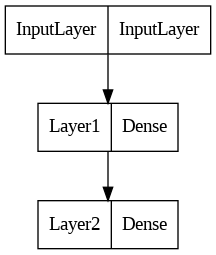

In [ ]:
tf.keras.utils.plot_model(model)

## Predict

In [ ]:
model.predict([[9]])

ValueError: ignored

In [ ]:
(np.array([9]) + 5) * 0.3

array([4.2])

## Build a simple Neural Netowrk with Keras Sequential

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=[1], name="Input_Layer"),
                                    tf.keras.layers.Dense(3, activation="relu", name="First_Layer"),
                                    tf.keras.layers.Dense(1, activation="relu",name="Output_Layer"),
                                    ])

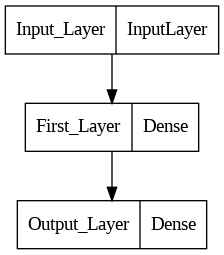

In [ ]:
tf.keras.utils.plot_model(model)

## Build a simple Neural Netowrk with Keras Functional

In [ ]:
input_layer = tf.keras.layers.Input(shape=[1], name="Input_layer")
layer_1 = tf.keras.layers.Dense(2, name="First_Layer")(input_layer)
output_layer = tf.keras.layers.Dense(1, name="Output_layer")(layer_1)

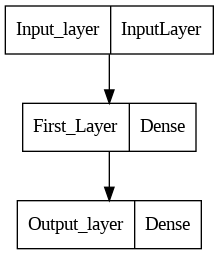

In [ ]:
model = tf.keras.Model(inputs = input_layer, outputs = output_layer)
tf.keras.utils.plot_model(model)

## Non-sequential NN (1)

In [ ]:
input_layer = tf.keras.layers.Input(shape=[10])
hidden1 = tf.keras.layers.Dense(30, activation="relu", name="hidden_layer_1")(input_layer)
hidden2 = tf.keras.layers.Dense(30, activation="relu", name="hidden_layer_2")(hidden1)
concat = tf.keras.layers.Concatenate()([input_layer, hidden2])
output = tf.keras.layers.Dense(1)(concat)

In [ ]:
model = tf.keras.Model(inputs=[input_layer], outputs=[output])

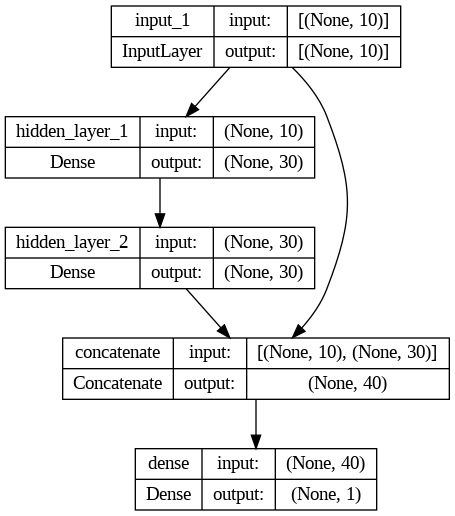

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Non-sequential NN (2)

In [ ]:
input_A = tf.keras.layers.Input(shape=[5], name="input_A")
input_B = tf.keras.layers.Input(shape=[6], name="input_B")
hidden1 = tf.keras.layers.Dense(30, activation="relu", name="hidden_1")(input_B)
hidden2 = tf.keras.layers.Dense(30, activation="relu", name="hidden_2")(hidden1)
concat = tf.keras.layers.concatenate([input_A, hidden2])
output = tf.keras.layers.Dense(1, name="output")(concat)

In [ ]:
model = tf.keras.Model(inputs=[input_A, input_B], outputs = [output])

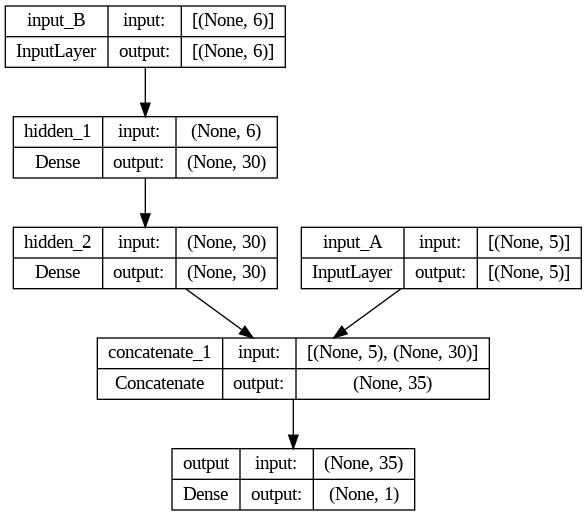

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True)

## Keras Sequential API

In [ ]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd

## load dataset from keras dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

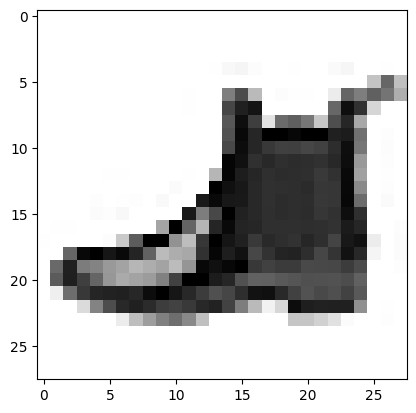

In [ ]:
plt.imshow(X_train[64], cmap="binary")
plt.show()

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[64]]

'Ankle boot'

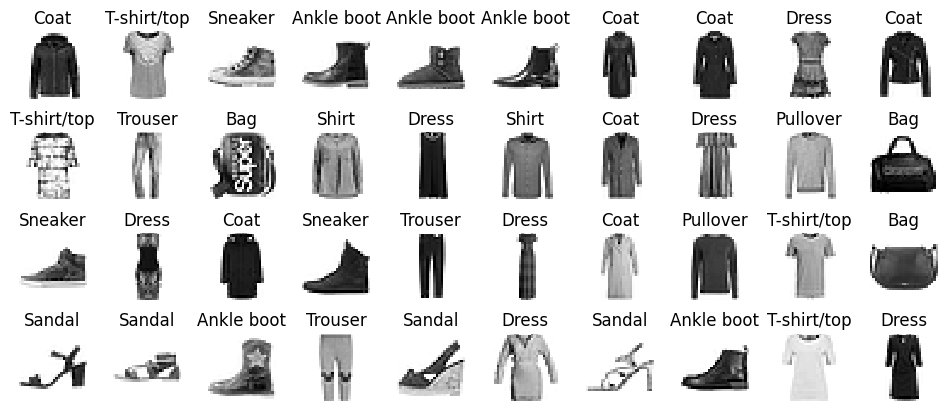

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

##  Design and build Neural Network to classify the MINST

In [ ]:
model = keras.models.Sequential([
                                keras.layers.Input(shape=[28, 28], name="input_layer"),
                                keras.layers.Flatten(name="1st_layer_flatten"),
                                keras.layers.Dense(200, activation="relu", name="2nd_hidden_layer"),
                                keras.layers.Dense(100, activation="relu", name="3nd_hidden_layer"),
                                keras.layers.Dense(10, activation="softmax", name="Output_layer"),
])

## Check model object

In [ ]:
model.layers

In [ ]:
model.layers[0]

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_layer_flatten (Flatten)  (None, 784)              0         
                                                                 
 2nd_hidden_layer (Dense)    (None, 200)               157000    
                                                                 
 3nd_hidden_layer (Dense)    (None, 100)               20100     
                                                                 
 Output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


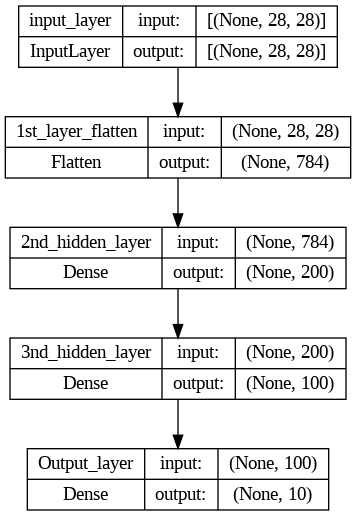

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Compile Model

In [ ]:
 model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Train Model

In [ ]:
 history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7395 - accuracy: 0.7548 - val_loss: 0.5119 - val_accuracy: 0.8278
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4929 - accuracy: 0.8285 - val_loss: 0.4665 - val_accuracy: 0.8368
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4482 - accuracy: 0.8429 - val_loss: 0.4392 - val_accuracy: 0.8530
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4203 - accuracy: 0.8521 - val_loss: 0.4144 - val_accuracy: 0.8530
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3995 - accuracy: 0.8595 - val_loss: 0.3956 - val_accuracy: 0.8630
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3833 - accuracy: 0.8642 - val_loss: 0.3858 - val_accuracy: 0.8666
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3704 - accuracy: 0.8688 - val_loss: 0.3602 - val_accuracy:

## Plot the learning curve

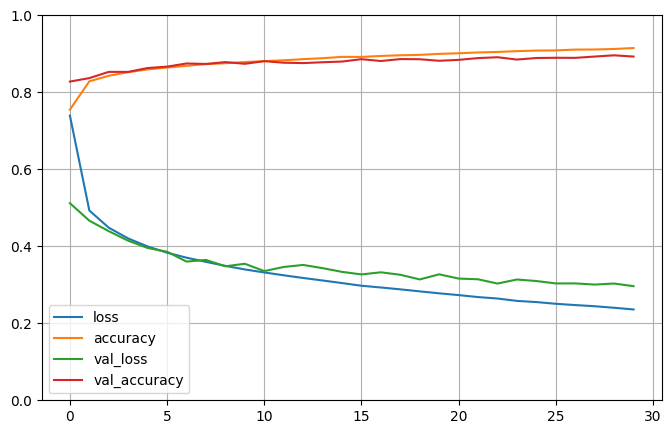

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3339 - accuracy: 0.8785


[0.3338991105556488, 0.8784999847412109]

In [ ]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[1.8838658e-05, 1.5091703e-06, 8.6872506e-06, ..., 2.6056439e-02,
        1.6881882e-03, 9.6315831e-01],
       [2.4543593e-05, 1.1336336e-08, 9.8831868e-01, ..., 2.3593980e-09,
        1.0798104e-07, 2.7735909e-11],
       [8.4607700e-06, 9.9999100e-01, 1.8001638e-08, ..., 5.5418170e-12,
        1.6468413e-09, 3.0160593e-11],
       ...,
       [2.2633469e-03, 8.9930774e-07, 7.7793025e-04, ..., 8.0712505e-07,
        9.9530262e-01, 2.1907461e-10],
       [9.3136705e-06, 9.9987793e-01, 2.6175135e-06, ..., 6.9353487e-09,
        3.2542178e-07, 2.2864283e-06],
       [6.8356894e-05, 6.7607466e-06, 1.7163662e-04, ..., 1.4418945e-02,
        7.2311593e-04, 1.8797815e-04]], dtype=float32)

In [ ]:
y_pred.shape, y_test.shape

((10000, 10), (10000,))

In [ ]:
acc = tf.keras.metrics.sparse_categorical_accuracy(y_test, y_pred)

In [ ]:
 acc.numpy().sum() / acc.numpy().shape[0]

0.8785

## Excercise : Build a model while trying different types of layers, neurons, loss, and functions